A notebook for testing and developing the function efficient_cone_and_projected_interval_sample

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import torch


from probabilistic_model_synthesis.simulation import efficient_cone_and_projected_interval_sample

## Parameters go here 

In [74]:
ang_range = [1*np.pi + 2*np.pi, 1.7*np.pi + 2*np.pi]
w = torch.randn(10000)
interval = [4, 5]
small_std = .01
big_std = 1.0

## Generate random data 

In [75]:
n_vars = len(w)
locs = torch.rand([n_vars,2])

In [76]:
smps = efficient_cone_and_projected_interval_sample(n_smps=100, locs=locs, ctr = torch.tensor([.5, .5]),
                                                    ang_range=ang_range, w=w, interval=interval,
                                                    big_std=big_std, small_std=small_std, 
                                                    device=torch.device('cuda'))
                                                    

## View results 

In [77]:
smps = smps.cpu().numpy()

In [78]:
smp_stds = np.std(smps,0)

min_smp_std = np.min(smp_stds)
max_smp_std = np.max(smp_stds)
smp_std_span = max_smp_std - min_smp_std

smp_stds_scaled = (smp_stds - min_smp_std)/smp_std_span

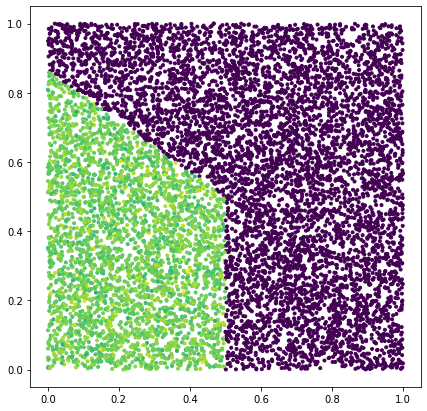

In [79]:
plot_std_clrs = cm.viridis(smp_stds_scaled)

plt.figure(figsize=(7, 7))
ax = plt.subplot(1,1,1)
ax.scatter(locs[:,0], locs[:,1], marker='.', color=plot_std_clrs)


(array([7525.,    0.,    0.,    0.,    0.,    0.,  105., 1206., 1077.,
          87.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

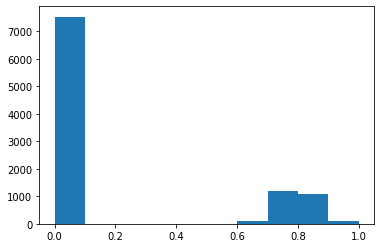

In [28]:
plt.hist(smp_stds_scaled)